In [106]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [107]:
df = pd.read_csv(r"sales_data.csv")
df

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680
...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717


# Basic Info of Data

In [108]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Date         100 non-null    str  
 1   Product      100 non-null    str  
 2   Quantity     100 non-null    int64
 3   Price        100 non-null    int64
 4   Customer_ID  100 non-null    str  
 5   Region       100 non-null    str  
 6   Total_Sales  100 non-null    int64
dtypes: int64(3), str(4)
memory usage: 5.6 KB


In [109]:
df.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

In [110]:
df.describe()

,Quantity,Price,Total_Sales
count,100.000000,100.000000,100.000000
mean,4.780000,25808.510000,123650.480000
std,2.588163,13917.630242,100161.085275
min,1.000000,1308.000000,6540.000000
25%,2.750000,14965.250000,39517.500000
50%,5.000000,24192.000000,97955.500000
75%,7.000000,38682.250000,175792.500000
max,9.000000,49930.000000,373932.000000


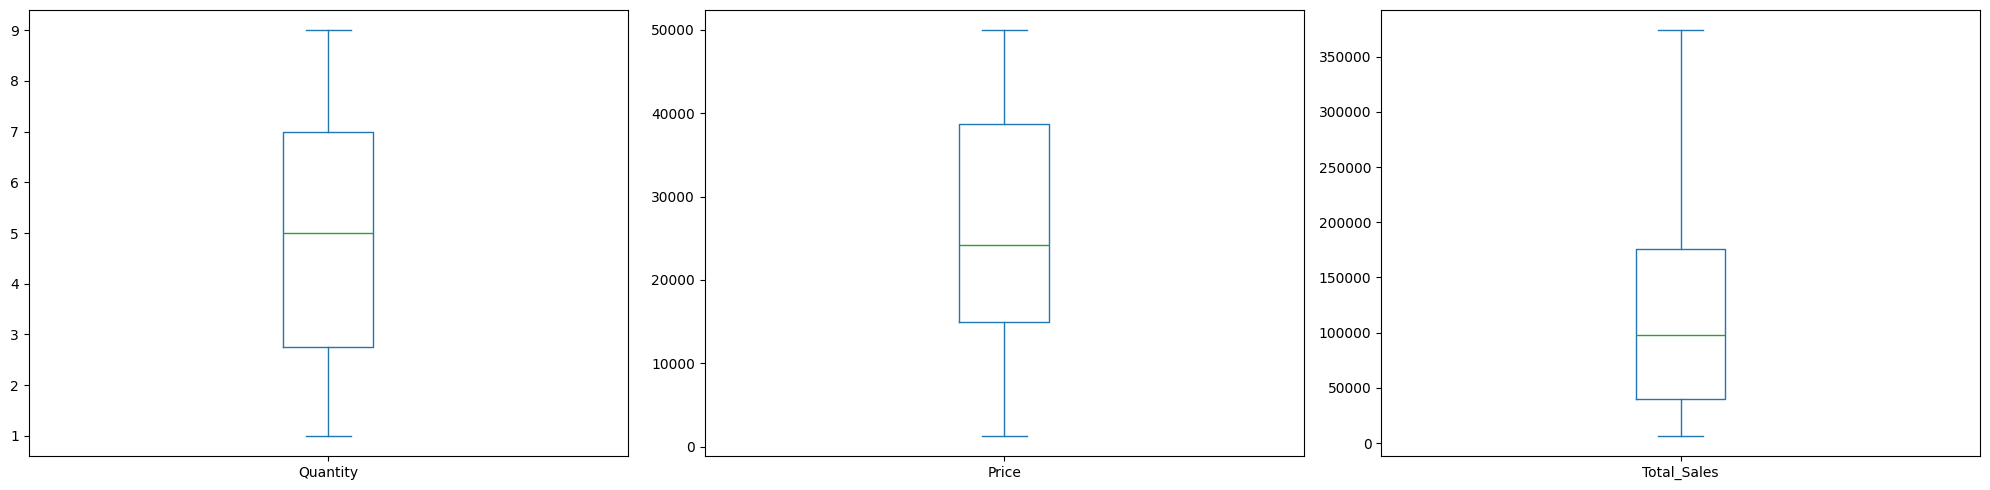

In [111]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
df['Quantity'].plot(kind='box')

plt.subplot(1,3,2)
df['Price'].plot(kind='box')

plt.subplot(1,3,3)
df['Total_Sales'].plot(kind='box')

plt.tight_layout()
plt.show()

In [112]:
df[["Year", "Month", "Day"]] = df["Date"].str.split("-", expand=True)
df

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Day
0,2024-01-01,Phone,7,37300,CUST001,East,261100,2024,01,01
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024,01,02
2,2024-01-03,Phone,2,21746,CUST003,West,43492,2024,01,03
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,2024,01,04
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024,01,05
...,...,...,...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160,2024,04,05
96,2024-04-06,Headphones,1,7647,CUST097,West,7647,2024,04,06
97,2024-04-07,Tablet,5,27196,CUST098,East,135980,2024,04,07
98,2024-04-08,Monitor,1,30717,CUST099,North,30717,2024,04,08


In [113]:
df.drop(['Date'], axis=1, inplace=True)
df 

,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Day
0,Phone,7,37300,CUST001,East,261100,2024,01,01
1,Headphones,4,15406,CUST002,North,61624,2024,01,02
2,Phone,2,21746,CUST003,West,43492,2024,01,03
3,Headphones,1,30895,CUST004,East,30895,2024,01,04
4,Laptop,8,39835,CUST005,North,318680,2024,01,05
...,...,...,...,...,...,...,...,...,...
95,Tablet,8,20770,CUST096,North,166160,2024,04,05
96,Headphones,1,7647,CUST097,West,7647,2024,04,06
97,Tablet,5,27196,CUST098,East,135980,2024,04,07
98,Monitor,1,30717,CUST099,North,30717,2024,04,08


# Monthly Sales Analysis

In [156]:
monthly_revenue_df = df.groupby('Month').agg(
    monthly_sales=('Total_Sales', 'sum'),
    monthly_customers = ('Customer_ID', 'nunique')    
)
print(monthly_revenue_df)

       monthly_sales  monthly_customers
Month                                  
01           4120524                 31
02           2656050                 29
03           4485006                 31
04           1103468                  9


<Axes: title={'center': 'Customer Count'}, xlabel='Month'>

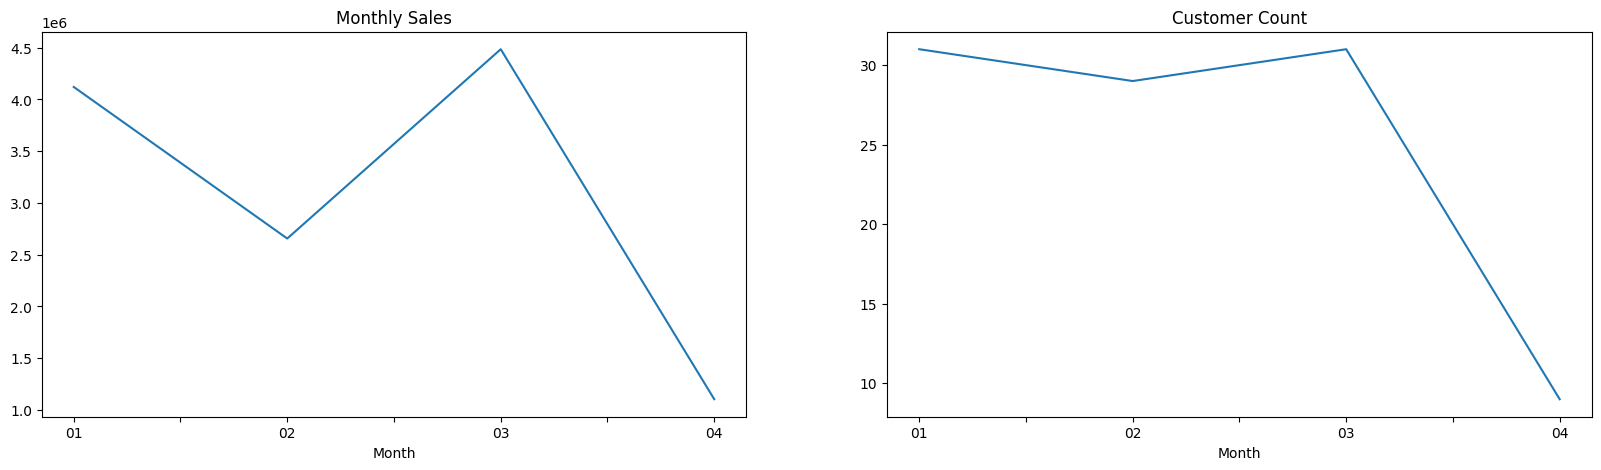

In [149]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
monthly_revenue_df["monthly_sales"].plot(kind="line", title="Monthly Sales")

plt.subplot(1,2,2)
monthly_revenue_df["monthly_customers"].plot(kind="line", title="Customer Count")

# Product Performance Analysis

In [152]:
product_performance_df = df.groupby('Product').agg(
    total_sale = ('Total_Sales', 'sum'),
    quantity_sold = ('Quantity', 'sum'),
    count_customers = ('Customer_ID', 'nunique')
)
product_performance_df.sort_values(by='total_sale', ascending=False, inplace=True)
print(product_performance_df)

            total_sale  quantity_sold  count_customers
Product                                               
Laptop         3889210            136               24
Tablet         2884340            127               26
Phone          2859394            101               20
Headphones     1384033             48               15
Monitor        1348071             66               15


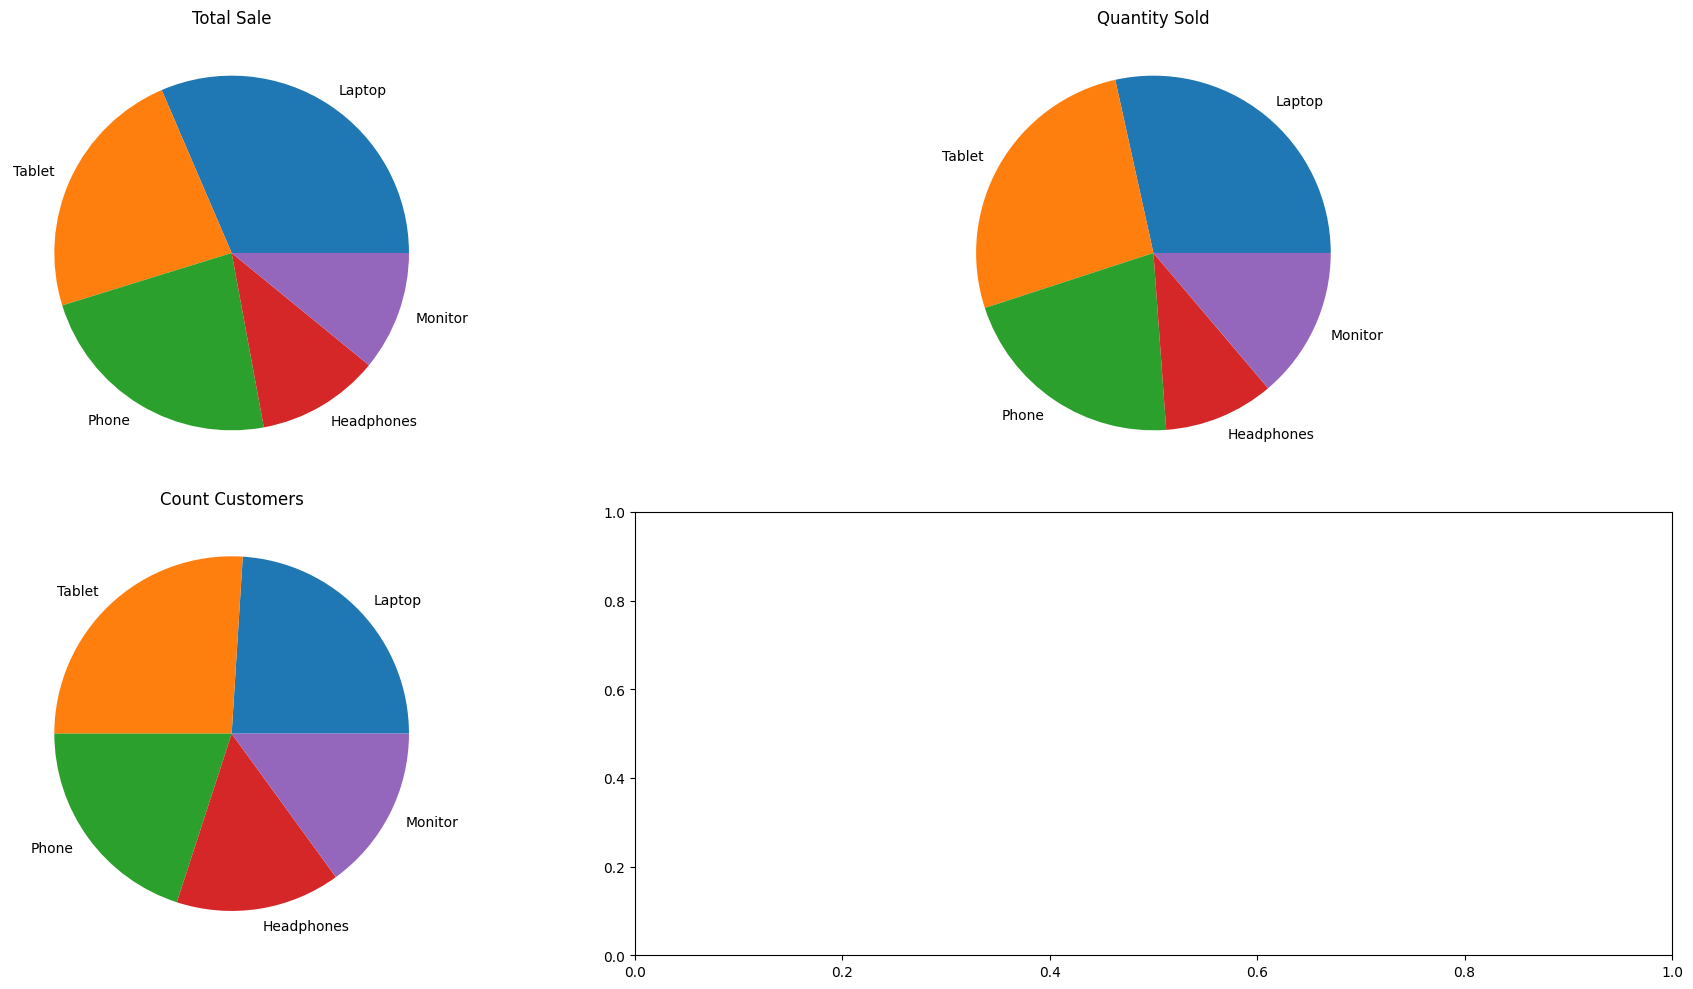

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

product_performance_df["total_sale"].plot(kind='pie', ax=axes[0,0], title="Total Sale")
product_performance_df["quantity_sold"].plot(kind='pie', ax=axes[0,1], title="Quantity Sold")
product_performance_df["count_customers"].plot(kind='pie', ax=axes[1,0], title="Count Customers")

plt.tight_layout()
plt.show()

# Region Wise Performance

In [155]:
region_wise_df = df.groupby('Region').agg(
    total_sale = ('Total_Sales', 'sum'),
    quantity_sold = ('Quantity', 'sum'),
    count_customers = ('Customer_ID', 'nunique')
)
region_wise_df.sort_values(by='total_sale', ascending=False, inplace=True)
print(region_wise_df)

        total_sale  quantity_sold  count_customers
Region                                            
North      3983635            147               28
South      3737852            143               27
East       2519639             94               19
West       2123922             94               26


In [154]:
df2 = df.copy()
df2 = df2[["Month", "Product", "Total_Sales","Customer_ID"]]
print(df2)

   Month     Product  Total_Sales Customer_ID
0     01       Phone       261100     CUST001
1     01  Headphones        61624     CUST002
2     01       Phone        43492     CUST003
3     01  Headphones        30895     CUST004
4     01      Laptop       318680     CUST005
..   ...         ...          ...         ...
95    04      Tablet       166160     CUST096
96    04  Headphones         7647     CUST097
97    04      Tablet       135980     CUST098
98    04     Monitor        30717     CUST099
99    04  Headphones       116880     CUST100

[100 rows x 4 columns]


# Month-Product Level Analysis

In [153]:
dfe = df2.groupby(['Month', 'Product']).agg(
    monthly_sales = ('Total_Sales', 'sum'),
    customer_count = ('Customer_ID', 'nunique')
)
print(dfe)

                  monthly_sales  customer_count
Month Product                                  
01    Headphones         241498               6
      Laptop            1981281               9
      Monitor             67662               2
      Phone              937670               6
      Tablet             892413               8
02    Headphones          73396               2
      Laptop             285064               3
      Monitor            772321               8
      Phone              838792               8
      Tablet             686477               8
03    Headphones         687734               4
      Laptop            1522863              11
      Monitor            477371               4
      Phone             1082932               6
      Tablet             714106               6
04    Headphones         381405               3
      Laptop             100002               1
      Monitor             30717               1
      Tablet             591344         

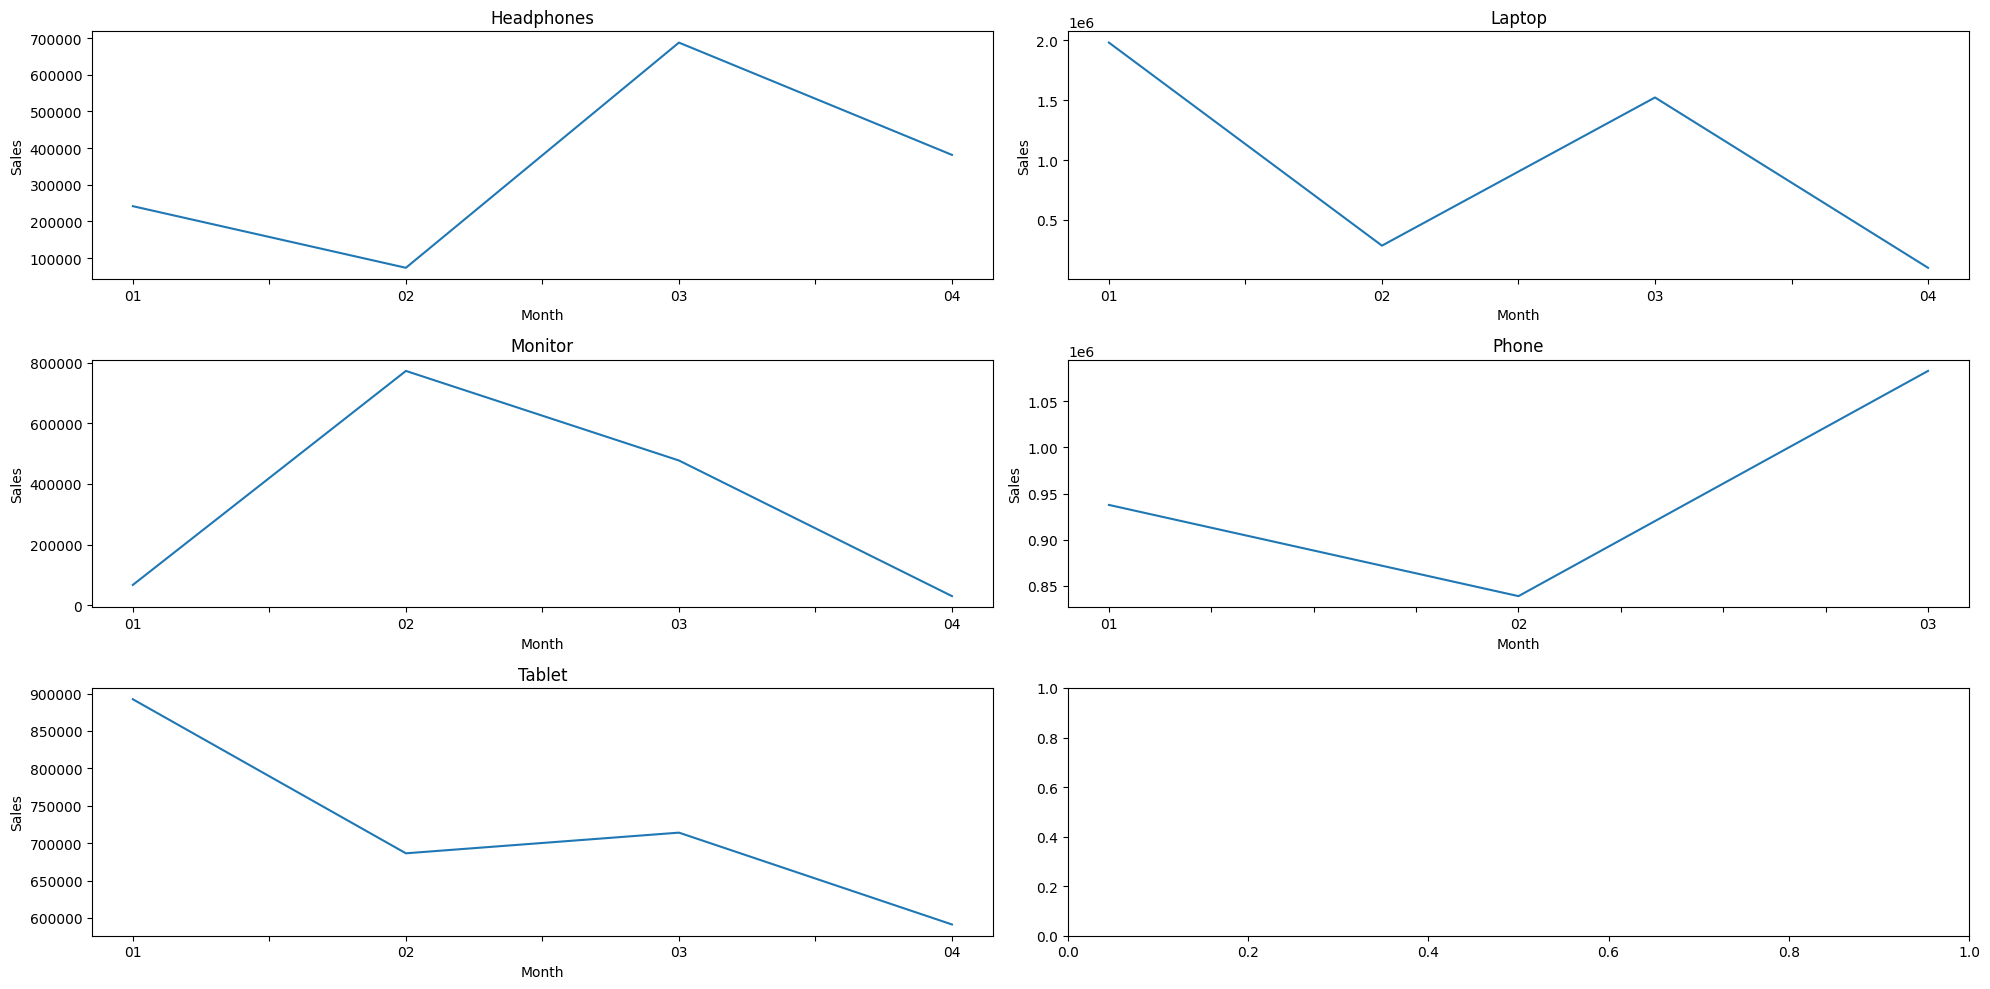

In [151]:
headphones_sales = dfe.xs('Headphones', level='Product')
laptop_sales = dfe.xs('Laptop', level='Product')
monitor_sales = dfe.xs('Monitor', level='Product')
phone_sales = dfe.xs('Phone', level='Product')
tablet_sales = dfe.xs('Tablet', level='Product')

fig, axes = plt.subplots(3, 2, figsize=(20,10))

headphones_sales["monthly_sales"].plot(kind='line', ax=axes[0,0], title="Headphones", ylabel="Sales")
laptop_sales["monthly_sales"].plot(kind='line', ax=axes[0,1], title="Laptop", ylabel="Sales")
monitor_sales["monthly_sales"].plot(kind='line', ax=axes[1,0], title="Monitor", ylabel="Sales")
phone_sales["monthly_sales"].plot(kind='line', ax=axes[1,1], title="Phone", ylabel="Sales")
tablet_sales["monthly_sales"].plot(kind='line', ax=axes[2,0], title="Tablet", ylabel="Sales")

plt.tight_layout()
plt.show()

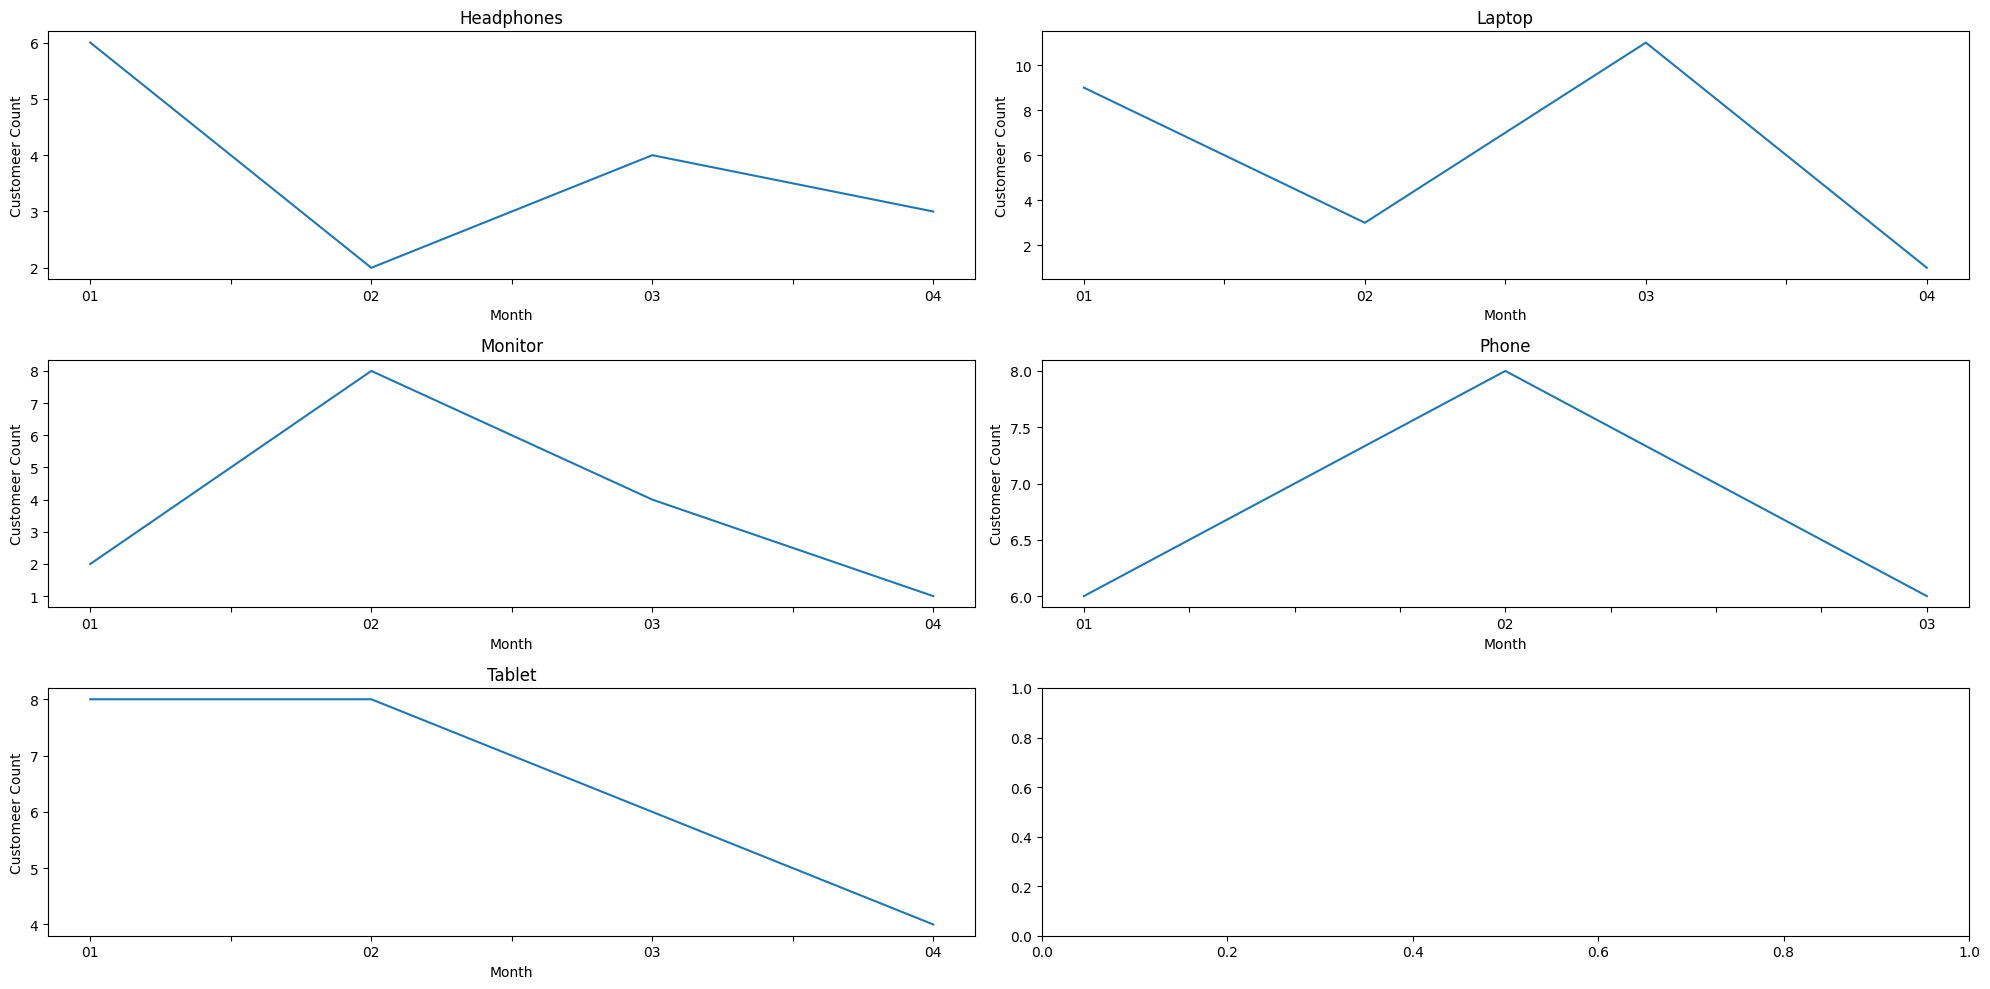

In [150]:
headphones_sales = dfe.xs('Headphones', level='Product')
laptop_sales = dfe.xs('Laptop', level='Product')
monitor_sales = dfe.xs('Monitor', level='Product')
phone_sales = dfe.xs('Phone', level='Product')
tablet_sales = dfe.xs('Tablet', level='Product')

fig, axes = plt.subplots(3, 2, figsize=(20,10))

headphones_sales["customer_count"].plot(kind='line', ax=axes[0,0], title="Headphones", ylabel="Customeer Count")
laptop_sales["customer_count"].plot(kind='line', ax=axes[0,1], title="Laptop", ylabel="Customeer Count")
monitor_sales["customer_count"].plot(kind='line', ax=axes[1,0], title="Monitor", ylabel="Customeer Count")
phone_sales["customer_count"].plot(kind='line', ax=axes[1,1], title="Phone", ylabel="Customeer Count")
tablet_sales["customer_count"].plot(kind='line', ax=axes[2,0], title="Tablet", ylabel="Customeer Count")

plt.tight_layout()
plt.show()